In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

In [ ]:
# 압축파일 경로
# 구글 드라이브인 경우 경로에 맞게 지정하세요.
source_file = '/content/drive/MyDrive/Dacon_wall/open.zip'

source_file

'/content/drive/MyDrive/Dacon_wall/open.zip'

In [ ]:
!pwd

/content


In [ ]:
# 압축 해제
with zipfile.ZipFile(source_file, 'r') as zf:

    zipinfo = zf.infolist()

    for member in zipinfo:

        member.filename = member.filename.encode('cp437').decode('euc-kr')

        zf.extract(member)

In [ ]:
import os

labels = os.listdir('/content/train')

In [ ]:
for label in labels:
  path = f'/content/train/{label}'
  print(f'{label} : {len(os.listdir(path))}')

울음 : 22
훼손 : 1405
녹오염 : 14
들뜸 : 54
이음부불량 : 17
반점 : 3
오염 : 595
피스 : 51
가구수정 : 12
곰팡이 : 145
창틀,문틀수정 : 27
터짐 : 162
꼬임 : 210
틈새과다 : 5
몰딩수정 : 130
걸레받이수정 : 307
오타공 : 142
면불량 : 99
석고수정 : 57


In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import os

image_dir = '/content/train' # 이미지 파일이 있는 디렉토리 경로
x_list = [] # 이미지 파일의 크기를 저장할 리스트
y_list = []

# 디렉토리 내의 모든 파일에 대해서 반복
for folder in os.listdir(image_dir):
    folder_dir = f'/content/train/{folder}'
    for filename in os.listdir(folder_dir):
      if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # 이미지 파일 불러오기
        img = Image.open(os.path.join(folder_dir, filename))
        # 이미지 크기를 리스트에 추가
        x_list.append(img.size[0])
        y_list.append(img.size[1])

In [ ]:
x_list = np.array(x_list)
y_list = np.array(y_list)

x_list.mean(), y_list.mean()

(645.6253977437084, 626.7897020538039)

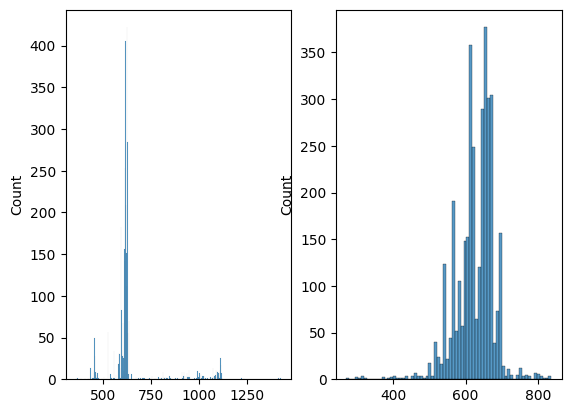

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1,2,1)
sns.histplot(x_list)
plt.subplot(1,2,2)
sns.histplot(y_list)

plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
from scipy.ndimage import sobel

# Sobel 필터 적용 함수
def apply_sobel_filter(img):
    # 이미지를 흑백으로 변환
    img_gray = img.convert('L')
    # Sobel 필터 적용
    img_sobel = sobel(np.array(img_gray))
    # 이미지를 0~255 범위로 정규화
    img_normalized = (img_sobel - np.min(img_sobel)) / (np.max(img_sobel) - np.min(img_sobel)) * 255
    # 이미지를 uint8 형식으로 변환
    img_uint8 = img_normalized.astype(np.uint8)
    # 이미지 객체로 변환
    img_final = Image.fromarray(img_uint8)
    return img_final

In [ ]:
# from tqdm import tqdm

# orignal_list = os.listdir('/content/train')

# for orignal in tqdm(orignal_list, desc='outer', position=0):
#   os.makedirs(f'/content/sobel_copy/train/{orignal}', exist_ok=True)
#   folder = os.listdir(f'/content/train/{orignal}')

#   for i, file in tqdm(enumerate(folder), desc='inner', position=1, leave=False):
#     img_path = f'/content/train/{orignal}/' + file
#     img = Image.open(img_path)
#     img = apply_sobel_filter(img)
#     img.save(f"/content/sobel_copy/train/{orignal}/{i}.png")

In [ ]:
# !mkdir sobel_test

In [ ]:
# from tqdm import tqdm

# orignal_test = os.listdir('/content/test')

# for orignal in tqdm(orignal_test):

#   img_path = '/content/test/' + orignal
#   img = Image.open(img_path)
#   img = apply_sobel_filter(img)
#   img.save(f"/content/sobel_test/{orignal}")

100%|██████████| 792/792 [00:44<00:00, 17.89it/s]


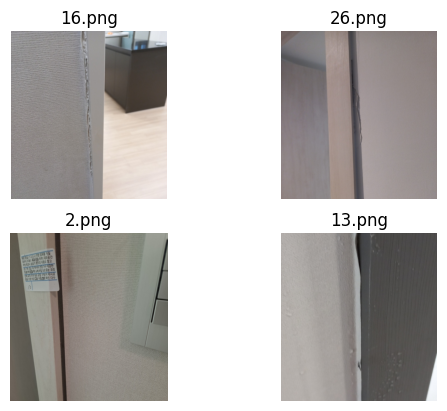

In [ ]:
import glob
import cv2
 
# 이미지가 저장된 디렉토리 경로 지정
data_dir = '/content/train/창틀,문틀수정/'

# 이미지 파일 이름 리스트 생성
img_list = os.listdir(data_dir)

# 랜덤으로 이미지 하나 선택
random_idx = np.random.randint(0, len(img_list), 4)
plt.rc('font', family='NanumBarunGothic') 

for i, idx in enumerate(random_idx, start=1):
  img_path = os.path.join(data_dir, img_list[idx])
  img = Image.open(img_path)
  # img = apply_sobel_filter(img)
  plt.subplot(2,2,i)
  plt.title(img_list[idx])
  plt.imshow(img, cmap='gray')
  plt.axis('off')

plt.show()

# # 이미지 출력
# plt.imshow(img)
# plt.x
# plt.axis('off')
# plt.show()

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
data_dir = '/content/train'

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir train_copy

In [ ]:
import splitfolders

splitfolders.ratio("/content/train", output="/content/train_copy", seed=1337, ratio=(.8, .1, .1))

Copying files: 3457 files [00:04, 784.75 files/s]


In [ ]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 3457 files belonging to 19 classes.
Using 2766 files for training.


In [ ]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 3457 files belonging to 19 classes.
Using 691 files for validation.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

# 학습 이미지에 적용한 augmentation 인자를 지정해줍니다.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)
# 검증 및 테스트 이미지는 augmentation을 적용하지 않습니다. 모델 성능을 평가할 때에는 이미지 원본을 사용합니다.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        '/content/train_copy/train',  # this is the target directory
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical') 

validation_generator = validation_datagen.flow_from_directory(
        '/content/train_copy/val',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        '/content/train_copy/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

Found 2759 images belonging to 19 classes.
Found 338 images belonging to 19 classes.
Found 360 images belonging to 19 classes.


In [ ]:
# !mkdir augumentation/가구수정

In [ ]:
# import numpy as np
# import os
# from os import listdir
# from os.path import isfile, join
# from PIL import Image
 
 
 
# np.random.seed(3)
 
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img

# filename_in_dir = []

# for root, dirs, files in os.walk('/content/train/가구수정'):
#     for  fname in files:
#         full_fname = os.path.join(root, fname)
#         filename_in_dir.append(full_fname)

# # 학습 이미지에 적용한 augmentation 인자를 지정해줍니다.
# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         zoom_range=0.2,
#         horizontal_flip=True)

# for file_image in filename_in_dir:
#     print(file_image)
#     img = load_img(file_image) 
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
 
#     i = 0
 
#     for batch in train_datagen.flow(x,save_to_dir='./augumentation/가구수정정', save_prefix='가구수정', save_format='png'):
#         i += 1
#         if i > 3:
#             break

In [ ]:
class_names = train_generator.class_indices
print(len(class_names))

19


In [ ]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)

base_model = keras.applications.ResNet101V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 370

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  377


In [ ]:
keras.backend.clear_session()

inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
# x = preprocess_input(inputs)


x = base_model(inputs)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 19)                38931     
                                                                 
Total params: 42,665,491
Trainable params: 3,453,971
Non-trainable params: 39,211,520
_________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=7,
                   restore_best_weights=True,
                   verbose=1)

mc = ModelCheckpoint(monitor='val_loss',
                    filepath='/content/drive/MyDrive/Dacon_wall/resnet101v2.h5',
                    save_best_only=True,
                     verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=1e-6)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(train_generator, epochs=20, callbacks=[es, mc, reduce_lr], validation_data=validation_generator)

Epoch 1/20
44/44 [==============================] - ETA: 0s - loss: 1.4219 - accuracy: 0.5611
Epoch 1: val_loss improved from inf to 1.89112, saving model to /content/drive/MyDrive/Dacon_wall/resnet101v2.h5
44/44 [==============================] - 75s 1s/step - loss: 1.4219 - accuracy: 0.5611 - val_loss: 1.8911 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 2/20
44/44 [==============================] - ETA: 0s - loss: 0.9141 - accuracy: 0.7097
Epoch 2: val_loss improved from 1.89112 to 1.31974, saving model to /content/drive/MyDrive/Dacon_wall/resnet101v2.h5
44/44 [==============================] - 65s 1s/step - loss: 0.9141 - accuracy: 0.7097 - val_loss: 1.3197 - val_accuracy: 0.6746 - lr: 0.0010
Epoch 3/20
44/44 [==============================] - ETA: 0s - loss: 0.7552 - accuracy: 0.7477
Epoch 3: val_loss improved from 1.31974 to 1.27775, saving model to /content/drive/MyDrive/Dacon_wall/resnet101v2.h5
44/44 [==============================] - 65s 1s/step - loss: 0.7552 - accuracy: 0.7477 

In [ ]:
model.evaluate(test_generator)

6/6 [==============================] - 6s 983ms/step - loss: 1.2129 - accuracy: 0.6889


[1.2128690481185913, 0.6888889074325562]

In [ ]:
# 필요한 라이브러리와 모듈을 가져옵니다.
import tensorflow as tf
import numpy as np
import cv2
import os

# 이미지 폴더 경로를 설정합니다.
img_folder = '/content/sobel_test'

# 이미지 데이터를 불러올 수 있는 함수를 작성합니다.
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# 이미지 데이터를 batch_size 단위로 나누고, 모델에 입력하여 예측합니다.
images = load_images_from_folder(img_folder)
batch_size = 64
results = []
for i in range(0, len(images), batch_size):
    batch = images[i:i+batch_size]
    batch = [cv2.resize(img, (224, 224)) for img in batch]  # 모델에 맞는 이미지 크기로 조정
    batch = np.array(batch) / 255.0
    predictions = model.predict(batch)
    results.extend(predictions)

# 결과를 저장하거나 출력합니다.
print(results)

1/1 [==============================] - 1s 1s/step
[array([3.2979337e-05, 5.0104953e-02, 2.4314957e-04, 5.3362799e-04,
       3.1122414e-05, 9.7081349e-05, 2.2625206e-01, 2.6372890e-03,
       2.8137682e-05, 4.7834995e-04, 4.6613201e-02, 1.9762445e-04,
       7.3668407e-03, 4.4757547e-03, 3.1864428e-04, 2.2824859e-02,
       5.9972754e-05, 3.4280692e-04, 6.3736159e-01], dtype=float32), array([8.1177609e-07, 4.3311641e-03, 8.1624137e-05, 1.8888892e-04,
       7.1334041e-05, 1.6981887e-05, 2.8180140e-03, 1.5428079e-04,
       8.5242200e-06, 1.7473001e-04, 9.8400153e-03, 3.9361239e-05,
       4.8187462e-04, 8.4898587e-05, 3.1195965e-04, 1.1184252e-02,
       1.8078787e-04, 2.1553025e-05, 9.7000891e-01], dtype=float32), array([5.0851067e-05, 9.1152340e-03, 2.1532630e-04, 1.3146801e-02,
       5.7783292e-04, 2.4723966e-04, 8.6341619e-02, 1.0835680e-03,
       1.1692471e-04, 1.7720632e-03, 7.7509530e-02, 2.7752609e-04,
       5.5588074e-03, 3.9909044e-03, 2.4038998e-03, 3.8393561e-02,
       

In [ ]:
answer = np.array(results)

In [ ]:
answer = answer.argmax(axis=1)

In [ ]:
answer[:5]

array([18, 18, 18, 18, 18])

In [31]:
import pandas as pd

submit = pd.read_csv('/content/drive/MyDrive/Dacon_wall/result_best.csv')

In [32]:
submit.head()

,id,label
0,TEST_000,훼손
1,TEST_001,오염
2,TEST_002,석고수정
3,TEST_003,몰딩수정
4,TEST_004,오염


In [33]:
import os
from collections import defaultdict

path = '/content/drive/MyDrive/yolov8l/labels/'

result = defaultdict(list)

for file in os.listdir(path):
  file_path = path + file
  
  target = int(file.split('.')[0])
  with open(file_path, 'r') as file:
    content = file.read()[:-1]
    for c in content.split('\n'):
      k = c.split(' ')
      result[target].append((k[0], k[-1]))

result

defaultdict(list,
            {2: [('3', '0.640558')],
             4: [('16', '0.809241')],
             12: [('16', '0.634279')],
             9: [('9', '0.881668')],
             15: [('3', '0.500201')],
             11: [('9', '0.738512')],
             13: [('16', '0.88861')],
             18: [('16', '0.806428')],
             19: [('3', '0.53608')],
             25: [('3', '0.706236')],
             34: [('9', '0.564754')],
             31: [('3', '0.638462')],
             37: [('3', '0.509309')],
             33: [('16', '0.742864')],
             27: [('8', '0.566341')],
             32: [('3', '0.681856')],
             51: [('16', '0.55847')],
             45: [('3', '0.691183')],
             49: [('16', '0.579976')],
             56: [('3', '0.787914')],
             53: [('3', '0.719218')],
             60: [('9', '0.786622')],
             57: [('0', '0.556661')],
             58: [('16', '0.715231')],
             62: [('3', '0.565888'), ('3', '0.561047')],
           

In [34]:
incoding = {0:'석고수정',
1:'울음',
2:'반점',
3:'훼손',
4:'몰딩수정',
5:'들뜸',
6:'꼬임',
7:'가구수정',
8:'곰팡이',
9:'오타공',
10:'피스',
11:'걸레받이수정',
12:'이음부불량',
13:'창틀,문틀수정',
14:'틈새과다',
15:'터짐',
16:'오염',
17:'녹오염',
18:'면불량'}

In [35]:
for key, value in result.items():
  id = 'TEST_' + '0' * (3 - len(str(key))) + str(key)
  temp = max(value, key=lambda x:x[1])
  tmp = incoding[int(temp[0])]
  submit.loc[submit['id'] == id, 'label'] = tmp


In [36]:
submit.head()

,id,label
0,TEST_000,훼손
1,TEST_001,오염
2,TEST_002,훼손
3,TEST_003,몰딩수정
4,TEST_004,오염


In [37]:
submit.to_csv('/content/drive/MyDrive/Dacon_wall/yolov8_l.csv', index=False)